# Music Clustering Project

### Step 1: Data Loading and Preprocessing

In [24]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

df = pd.read_csv('ML_spotify_data.csv')
print(df.head())

features = ['danceability', 'valence', 'energy', 'liveness', 'speechiness', 'tempo']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

print(df[features].head())


def recommend_songs(user_preferences, df, features, n_recommendations=5):
    user_pref_df = pd.DataFrame([user_preferences], columns=features)
    scaled_user_pref = scaler.transform(user_pref_df)
    
    distances = np.linalg.norm(df[features].values - scaled_user_pref, axis=1)
    df['distance'] = distances
    
    recommended_songs = df.sort_values(by='distance').head(n_recommendations)
    return recommended_songs



                                               name            artists  \
0              We're For The Dark - Remastered 2010      ['Badfinger']   
1                       Sixty Years On - Piano Demo     ['Elton John']   
2                           Got to Find Another Way  ['The Guess Who']   
3  Feelin' Alright - Live At The Fillmore East/1970     ['Joe Cocker']   
4                                  Caravan - Take 7   ['Van Morrison']   

   popularity  danceability  valence  energy  explicit  key  liveness  \
0          22         0.678    0.559   0.432         0    3    0.0727   
1          25         0.456    0.259   0.368         0    6    0.1560   
2          21         0.433    0.833   0.724         0    0    0.1700   
3          22         0.436    0.870   0.914         0    5    0.8550   
4          23         0.669    0.564   0.412         0    7    0.4010   

   loudness  speechiness    tempo  
0   -12.696       0.0334  117.674  
1   -10.692       0.0280  143.783  
2    -9.

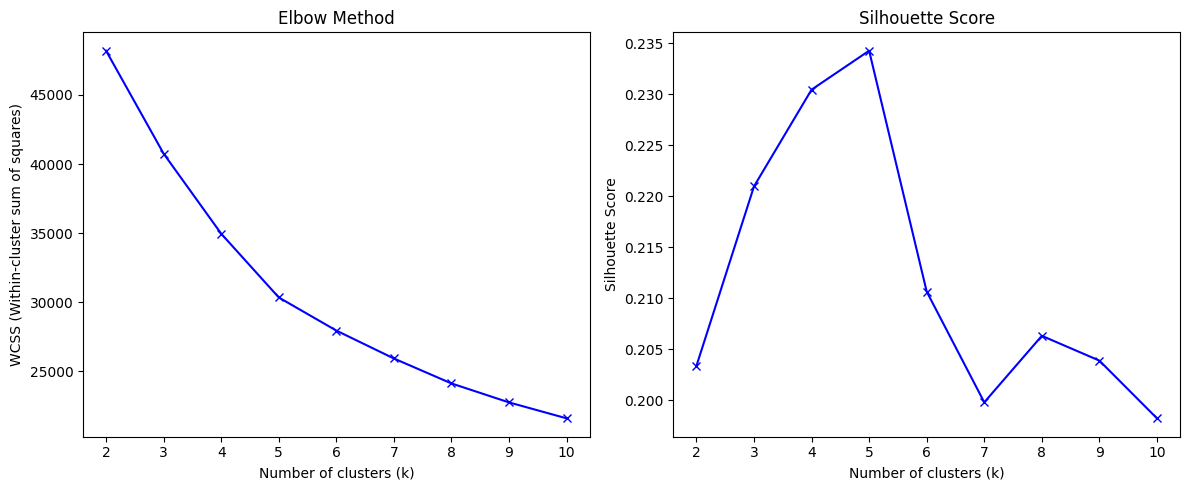

In [25]:
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'bx-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [26]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(df[features])

print('Cluster Analysis:')
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)


Cluster Analysis:
         danceability   valence    energy  liveness  speechiness       tempo
cluster                                                                     
0            0.595895  0.555589  0.598504  0.211608     0.083786   99.195388
1            0.529710  0.517999  0.623632  0.217802     0.074031  142.999445
2            0.447112  0.548966  0.664510  0.220199     0.102832  175.354824
3            0.607349  0.548944  0.611746  0.204251     0.067119  121.558304
4            0.476997  0.407591  0.449628  0.197714     0.094936   78.747444


In [27]:
user_pref = {
    'danceability': 0.7, 
    'valence': 0.8, 
    'energy': 0.75, 
    'liveness': 0.2,
    'acousticness': 0.1, 
    'speechiness': 0.15, 
    'instrumentalness': 0.05, 
    'tempo': 120
}

recommended_songs_df = recommend_songs(user_pref, df, features)
print('Song Recommendation for Cluster 0:')
print(recommended_songs_df)


Song Recommendation for Cluster 0:
                        name                artists  popularity  danceability  \
8938     Clouds As Witnesses        ['$uicideBoy$']          52           0.0   
6335            Magic Window   ['Boards of Canada']          37           0.0   
5597            Silent Track   ['Robert Earl Keen']          32           0.0   
9282  Pink Noise - BP 240 hz           ['Granular']          61           0.0   
1406   Electro Lux Imbroglio  ['Steve Miller Band']          22           0.0   

      valence    energy  explicit  key  liveness  loudness  speechiness  \
8938      0.0  0.630000         1    2     0.127    -6.707          0.0   
6335      0.0  0.000000         0    0     0.000   -60.000          0.0   
5597      0.0  0.000000         0    0     0.000   -60.000          0.0   
9282      0.0  0.001720         0    4     0.110   -27.848          0.0   
1406      0.0  0.000028         0    1     0.109   -21.825          0.0   

      tempo  cluster  dista

### Hierarchical Clustering

In [28]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
df['h_cluster'] = agg_clustering.fit_predict(df[features])

print('Hierarchical Clustering Results:')
print(df['h_cluster'].value_counts())


Hierarchical Clustering Results:
h_cluster
0    4620
1    4086
2    1294
Name: count, dtype: int64


### DBSCAN

In [29]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(df[features])

print('DBSCAN Clustering Results:')
print(df['dbscan_cluster'].value_counts())


DBSCAN Clustering Results:
dbscan_cluster
 0     9490
-1      350
 1       24
 14      16
 8       12
 11      11
 7       10
 10      10
 4        9
 3        8
 2        8
 13       7
 9        7
 16       6
 17       6
 12       6
 18       5
 5        5
 6        5
 15       5
Name: count, dtype: int64


### Gaussian Mixture Model (GMM)

In [30]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(df[features])
df['gmm_cluster'] = gmm.predict(df[features])

print('GMM Clustering Results:')
print(df['gmm_cluster'].value_counts())


GMM Clustering Results:
gmm_cluster
2    4823
1    3628
0    1549
Name: count, dtype: int64
